In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = 'Fertilizer Prediction.csv'
df = pd.read_csv(PATH)

## Data Preprocessing

In [5]:
from numpy import array
from sklearn.preprocessing import LabelEncoder

In [6]:
soil_type= array(df['Soil Type'].tolist())
crop_type= array(df['Crop Type'].tolist())

In [7]:
crop_type

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Cotton', 'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Maize',
       'Cotton', 'Paddy', 'Ground Nuts', 'Sugarcane', 'Pulses', 'Barley',
       'Cotton', 'Wheat', 'Millets', 'Sugarcane', 'Tobacco', 'Millets',
       'Paddy', 'Maize', 'Cotton', 'Sugarcane', 'Oil seeds', 'Pulses',
       'Ground Nuts', 'Sugarcane', 'Paddy', 'Barley', 'Wheat', 'Millets',
       'Cotton', 'Paddy', 'Ground Nuts', 'Millets', 'Pulses', 'Sugarcane',
       'Tobacco', 'Sugarcane', 'Barley', 'Wheat', 'Oil seeds', 'Paddy',
       'Ground Nuts', 'Maize', 'Tobacco', 'Oil seeds', 'Pulses', 'Barley',
       'Cotton', 'Millets', 'Wheat', 'Millets', 'Sugarcane',
       'Ground Nuts', 'Paddy', 'Wheat', 'Cotton', 'Barley', 'Oil seeds',
       'Cotton', 'Sugarcane', 'Sugarcane', 'Pulses', 'Millets', 'Pulses',
       'Tobacco', 'Wheat', 'Oil seeds', 'Ground Nuts', 'Paddy', 'Maize',
       'Sugarcane', 'Pulses', 'Cotton', 'Paddy', 'Millets', 'Cotton'

In [8]:
soil_type

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey', 'Sandy', 'Red',
       'Loamy', 'Sandy', 'Black', 'Clayey', 'Sandy', 'Loamy', 'Clayey',
       'Red', 'Black', 'Clayey', 'Sandy', 'Black', 'Loamy', 'Sandy',
       'Loamy', 'Red', 'Black', 'Clayey', 'Sandy', 'Red', 'Loamy',
       'Black', 'Clayey', 'Red', 'Loamy', 'Clayey', 'Sandy', 'Loamy',
       'Black', 'Loamy', 'Clayey', 'Red', 'Sandy', 'Clayey', 'Loamy',
       'Red', 'Black', 'Sandy', 'Loamy', 'Black', 'Clayey', 'Red',
       'Sandy', 'Red', 'Black', 'Clayey', 'Sandy', 'Red', 'Black',
       'Loamy', 'Sandy', 'Loamy', 'Red', 'Clayey', 'Loamy', 'Black',
       'Sandy', 'Black', 'Red', 'Black', 'Loamy', 'Clayey', 'Sandy',
       'Clayey', 'Red', 'Loamy', 'Black', 'Red', 'Clayey', 'Sandy',
       'Loamy', 'Clayey', 'Red', 'Clayey', 'Sandy', 'Black', 'Loamy',
       'Sandy', 'Clayey', 'Red', 'Black', 'Loamy', 'Loamy', 'Black',
       'Clayey', 'Red', 'Sandy', 'Clayey', 'Red', 'Loamy', 'Sandy',
       'Black'], dtype='<U6')

In [9]:
label_encoder = LabelEncoder()
integer_encoded1 = label_encoder.fit_transform(soil_type) #encoding soil type
integer_encoded2 = label_encoder.fit_transform(crop_type) #encoding crop type

In [10]:
integer_encoded1

array([4, 2, 0, 3, 1, 4, 3, 2, 4, 0, 1, 4, 2, 1, 3, 0, 1, 4, 0, 2, 4, 2,
       3, 0, 1, 4, 3, 2, 0, 1, 3, 2, 1, 4, 2, 0, 2, 1, 3, 4, 1, 2, 3, 0,
       4, 2, 0, 1, 3, 4, 3, 0, 1, 4, 3, 0, 2, 4, 2, 3, 1, 2, 0, 4, 0, 3,
       0, 2, 1, 4, 1, 3, 2, 0, 3, 1, 4, 2, 1, 3, 1, 4, 0, 2, 4, 1, 3, 0,
       2, 2, 0, 1, 3, 4, 1, 3, 2, 4, 0], dtype=int64)

In [11]:
dict1={}
for i in range(len(integer_encoded1)):
  dict1[soil_type[i]]=integer_encoded1[i]
dict2={}
for i in range(len(integer_encoded2)):
  dict2[crop_type[i]]=integer_encoded2[i]

In [12]:
dict1

{'Sandy': 4, 'Loamy': 2, 'Black': 0, 'Red': 3, 'Clayey': 1}

In [13]:
dict2

{'Maize': 3,
 'Sugarcane': 8,
 'Cotton': 1,
 'Tobacco': 9,
 'Paddy': 6,
 'Barley': 0,
 'Wheat': 10,
 'Millets': 4,
 'Oil seeds': 5,
 'Pulses': 7,
 'Ground Nuts': 2}

In [14]:
df['Soil Type']=df['Soil Type'].map(dict1)
df['Crop Type']=df['Crop Type'].map(dict2)

In [15]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,28-28
95,30,60,27,3,9,4,17,17,10-26-26
96,38,72,51,2,10,39,0,0,Urea
97,36,60,43,4,4,15,0,41,DAP


In [16]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type           int64
Crop Type           int64
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [18]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [19]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [20]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type           int64
Crop Type           int64
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [21]:
df['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

In [23]:
Fertilizer_Name=df['Fertilizer Name']

In [24]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform target column
df['Fertilizer Name'] = label_encoder.fit_transform(df['Fertilizer Name'])

<Axes: >

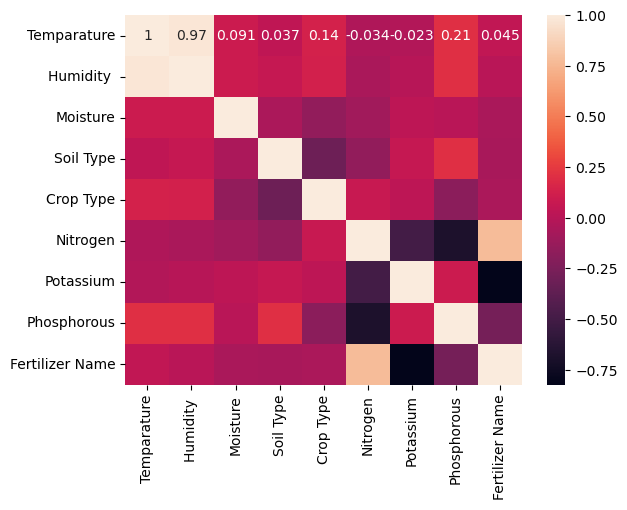

In [25]:
sns.heatmap(df.corr(),annot=True)

In [26]:
features=df
target = features.pop('Fertilizer Name')
label = target

In [27]:
features

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,4,3,37,0,0
1,29,52,45,2,8,12,0,36
2,34,65,62,0,1,7,9,30
3,32,62,34,3,9,22,0,20
4,28,54,46,1,6,35,0,0
...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19
95,30,60,27,3,9,4,17,17
96,38,72,51,2,10,39,0,0
97,36,60,43,4,4,15,0,41


In [28]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [29]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

##  Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  85.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      1.00      0.57         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5

    accuracy                           0.85        20
   macro avg       0.77      0.86      0.80        20
weighted avg       0.79      0.85      0.81        20



In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [33]:
score

array([0.95, 1.  , 0.95, 0.95, 1.  ])

## Gaussian Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.85
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00         2
           2       0.25      1.00      0.40         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5

    accuracy                           0.85        20
   macro avg       0.75      0.86      0.77        20
weighted avg       0.81      0.85      0.82        20



In [35]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

## SVC

In [36]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
# acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         2
           6       0.29      1.00      0.45         5

    accuracy                           0.40        20
   macro avg       0.33      0.33      0.28        20
weighted avg       0.32      0.40      0.29        20



In [47]:
# svm classifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(Xtrain, Ytrain)

# Accuray On Test Data
predictions = svm_pipeline.predict(Xtest)
accuracy = accuracy_score(Ytest, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

acc.append(accuracy)
print()



Accuracy on Test Data: 75.0%



In [38]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.35      , 0.25      , 0.3       , 0.2       , 0.26315789])

## Saving Trained Model Weights

In [49]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier_Fertilizer.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

In [ ]:
SVM.predict([[100,30,80,]])

In [ ]:
Xtest # Testing Dataset

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
93,28,54,25,4,3,9,10,30
30,29,58,40,3,2,24,0,23
56,34,65,54,2,10,38,0,0
24,33,64,39,1,6,13,0,10
16,33,64,34,1,7,38,0,0
23,28,54,37,0,4,36,0,0
2,34,65,62,0,1,7,9,30
27,32,62,30,2,8,38,0,0
28,37,70,32,0,5,12,0,39
13,32,62,41,1,6,24,0,22


##  Logistic Regression


In [39]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [40]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95, 1.  , 1.  , 1.  , 1.  ])

## Random Forest Classifier


In [41]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      1.00      0.80         2
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.88      0.90      0.85        20
weighted avg       0.94      0.90      0.89        20



In [42]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.9, 1. , 1. , 0.9, 1. ])

## XG Boost

In [43]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.95
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.94        20
weighted avg       0.97      0.95      0.95        20



In [44]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.95, 1.  , 0.95, 1.  , 1.  ])

## Accuracy of all the models on test data

In [45]:
acc

[0.85, 0.85, 1.0, 0.9, 0.95]

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Algorithm', ylabel='Accuracy'>

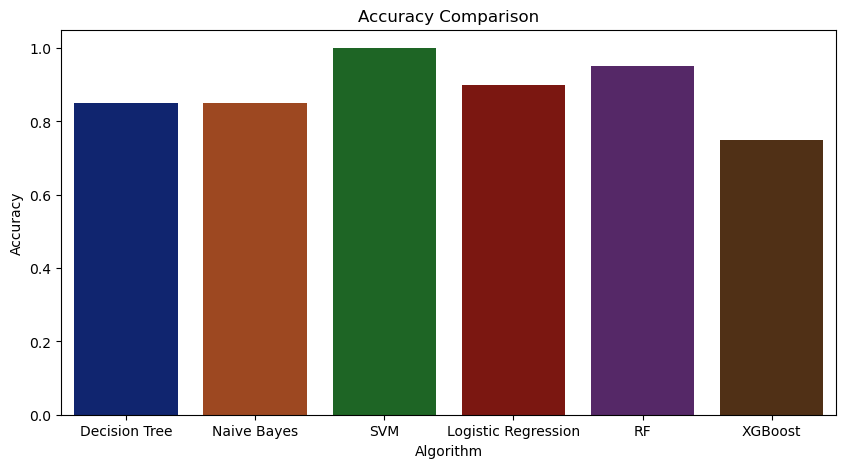

In [48]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
sns.barplot(y = acc,x = model,palette='dark')